# Modelling
>'In a sense, there is an impenetrable but transparent screen between our world of mathematical descriptions and the real world. We can look through this window and compare certain aspects of the physical system with its mathematical description, but we can never establish any exact connection between them. The question of nature's susceptibility to mathematical description has some deep philosophical aspects, and in practical terms we have to take a more pragmatic view of models. **Our acceptance of models should thus be guided by "usefulness" rather than "truth"**.'

                                                                                --Lennart Ljung

![modelling](modelling.png "Modelling")
![Lennart Ljung](ljung.jpg "Lennart Ljung")

# Modelling Dynamical Systems
It is amazing how many types of systems can be modelled using differential equations! 

| Electrical Circuits | Translational Mechanical <br>Systems | Rotational Mechanical <br>Systems | Thermal Systems | Hydrological Systems |
| --- | --- | --- | --- | --- |
| $v(t)$ - voltage <br>$q(t)$ - charge* | $f(t)$ - force <br>$x(t)$ - position | $T(t)$ - torque <br>$\theta(t)$ - angle | xxx | xxx |
| Capacitor <br>$v(t) = \frac{1}{C}q(t)$ | Spring <br>$f(t) = Kx(t)$ | Spring <br>$T(t)=K\theta(t)$ | xxx | xxx |
| Resistor <br>$v(t) = R \frac{\text{d}q(t)}{\text{dt}}$ | Damper <br>$f(t) = f_v\frac{\text{d}x(t)}{\text{dt}}$ | Damper <br>$T(t)=D\frac{\text{d}\theta(t)}{\text{dt}}$ | xxx | xxx |
| Inductor <br>$v(t) = L \frac{\text{d}^2q(t)}{\text{dt}^2}$ | Mass <br>$f(t) = M\frac{\text{d}^2x(t)}{\text{dt}^2}$ | Inertia <br>$T(t)=J\frac{\text{d}^2\theta(t)}{\text{dt}^2}$ | xxx | xxx |

*recall that current is equal to moving charges, i.e. $i(t) = \frac{\text{d}q(t)}{\text{dt}}$

Plus many more systems: populations, radioactive decay, economics, chemical processes, biological processes, etc.

# What is so special about differential equations? Why are they so common? 

I have not seen a very convincing answer to this question...
- "Time and space are continuous, therefore the equations governing changes in time and space should reflect this continuity" on Stack Exchange (https://physics.stackexchange.com/questions/349226/why-differential-equations)
- "The fact that the behavior of models described by differential equations has the property of being *locally specified* explains their prevalence: in time, there is no *action at a distance*." from "Introduction to Mathematical Systems Theory: A Behavioral Approach" by Jan Willem Polderman and Jan C. Willems.




# Modelling Rotational Mechanical Systems

Rotating Disks:

![Rotating Disk](Rotating_Disk_Galaxy.jpg "Rotating Disk")

![1 Disk Graphic Diagram](1diskSimpleGraphic.png "1 Disk Graphic Diagram")

A torque is applied to a thin flexible rod. A disk is attached to the rod. The rod is supported by bearings on the left side of the disk. The angular position of the rod at both ends is measured. 

We will:
- Obtain governing differential equations,
- Investigate effect of initial conditions on the setup,
- Derive the transfer function between angular position of the rod at the left side ($\theta_1$) and angular position of the rod at the right side ($\theta_2$),
- Analyze pole-zero map, 
- Analyze step response of system,
- See how to simulate the output of the system for any input using Python.


# Schematic Diagram 
![1 Disk Schematic Diagram](1diskSimpleSchematic.png "1 Disk Schematic Diagram")


# Free Body Diagram
![1 Disk Free Body Diagram](1diskSimpleFreeBody.png "1 Disk Free Body Diagram")


Expressions for torques:
$$
\begin{align*}
T_{S} & = k( \theta_1 - \theta_2 ) \\
T_{B} &= b \frac{\text{d}\theta_1}{\text{dt}} \\
\end{align*}
$$

$$
\begin{align*}
\sum_i T_i &= J \frac{\text{d}^2 \theta_2}{\text{dt}^2} \\
T_{S_1} - T_{B1} &= J \frac{\text{d}^2 \theta_2}{\text{dt}^2} \\
k(\theta_1 - \theta_2) - b \frac{\text{d} \theta_2}{\text{dt}} &= J \frac{\text{d}^2 \theta_2}{\text{dt}^2}
\end{align*}
$$
After rearanging:
$$
\begin{align*}
k \theta_1 = J \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b \frac{\text{d} \theta_2}{\text{dt}} + k \theta_2
\end{align*}
$$

This is the governing differential equation of the system! It is a model of the system. 

To start, let's calculate the unforced response (i.e. keep $\theta_1=0$). 

The unforced response of a system is purely due to initial conditions. In our example we can twist the disk to an initial starting position, and then let go. 

Recall from MATH 375 or AMAT 307 that the solution to this type of equation has the form $e^{at}$.

Plug $\theta_2(t) = e^{at}$ into the equation:

$$
\begin{align*}
J \frac{\text{d}^2}{\text{dt}^2}e^{at} + b\frac{\text{d}}{\text{dt}}e^{at} + k e^{at} &= 0 \\
Ja^2e^{at} + bae^{at} + ke^{at} &= 0 \\
(Ja^2 + b a + k)e^{at} &= 0 \\
(a-p_1)(a - p_2)e^{at} &= 0
\end{align*}
$$

We obtain the general solution:
$$
\begin{align*}
\theta_2(t) = c_1 e^{p_1 t} + c_2 e^{p_2 t}
\end{align*}
$$
To find the particular solution (i.e. solve for $c_1$ and $c_2$), need to know the initial conditions.

For dynamical systems, usually the initial conditions have the form: 
- position at time $t=0$ is known,
- velocity at time $t=0$ is known.

So in our case:
- $\theta_2(0)$ is known
- $\theta_2'(0)$ is known




Use these initial conditions to find the particular solution (i.e. solve for $c_1$ and $c_2$). 

Hint: start with general solution, and plug in $t=0$.

$$
\begin{align*}
\theta_2(t) &= c_1 e^{p_1 t} + c_2 e^{p_2 t}
\end{align*}
$$
Plug in $t=0$:
$$
\begin{align*}
\theta_2(0) &= c_1 + c_2 
\end{align*}
$$
This gives us one equation. 

Now, take derivative of general solution, and plug in $t=0$ to get second equation.

$$
\begin{align*}
\frac{\text{d}}{\text{dt}} \theta_2(t) &= \frac{\text{d}}{\text{dt}} \Big ( c_1 e^{p_1 t} + c_2 e^{p_2 t} \Big )
&= c_1 p_1 e^{p_1 t} + c_2 p_2 e^{p_2 t} 
\end{align*}
$$
Plug in $t=0$:
$$
\begin{align*}
\theta_2'(0) &= c_1p_1 + c_2p_2 
\end{align*}
$$
This gives us another equation. 

So we have 2 equations, 2 unknowns and $c_1$ and $c_2$ appear linearly. Can use linear algebra to solve for $c_1$ and $c_2$. 

Set up the linear equations:

$$
\begin{align*}
\begin{bmatrix} 1 & 1 \\ p_1 & p_2 \end{bmatrix}
\begin{bmatrix} c_1 \\ c_2 \end{bmatrix}
=
\begin{bmatrix} \theta_2(0) \\ \theta_2'(0) \end{bmatrix}
\end{align*}
$$
And we can solve for $c_1$ and $c_2$:
$$
\begin{align*}
\begin{bmatrix} c_1 \\ c_2 \end{bmatrix}
=
\begin{bmatrix} 1 & 1 \\ p_1 & p_2 \end{bmatrix}^{-1}
\begin{bmatrix} \theta_2(0) \\ \theta_2'(0) \end{bmatrix}
\end{align*}
$$



# In class activity!

Let's put it all together in Python!
- Simulate some responses to different initial conditions.
- Change the parameters of the system (spring constant and damping) to see effect on system response.

In [2]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math


Roots of characteristic equation: -0.25+0.66j and -0.25-0.66j
Particular solution is:  0.26-0.10j exp( -0.25+0.66j t) + 0.26+0.10j exp( -0.25-0.66j t)


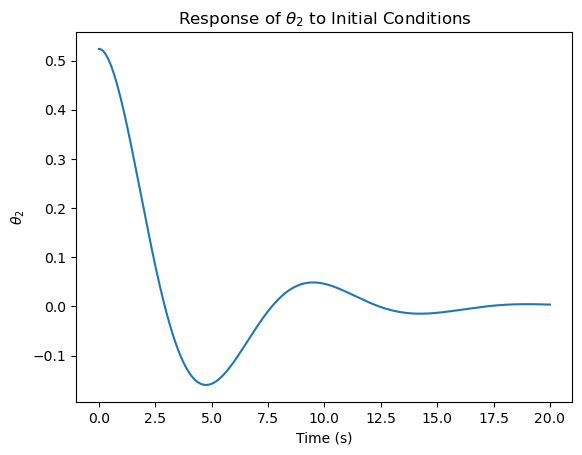

In [73]:
# specify parameters
b = 1
J = 2
k = 1

#specify initial conditions
theta2_0 = math.pi/6
dtheta2_0 = 0

# find roots of characteristic equation
characteristic_equation = np.array([J, b, k])
r = np.roots(characteristic_equation)

print('Roots of characteristic equation: ', '{:.2f}'.format(r[0]), ' and ', '{:.2f}'.format(r[1]), sep='')

#find coeficients of general solution using initial conditions
initial_conditions = np.array([theta2_0, dtheta2_0])
A = np.array([[1, 1], [r[0], r[1]]])
coefficients = np.linalg.inv(A) @ initial_conditions  #note @ means matrix multiply in python

print('Particular solution is: ', '{:.2f}'.format(coefficients[0]), 'exp(', '{:.2f}'.format(r[0]), 't) +', '{:.2f}'.format(coefficients[1]), 'exp(', '{:.2f}'.format(r[1]), 't)')

# plot the solution
N = 10000   #number of points
Tf = 20     #time in seconds of simulation

# generate the data
t = np.linspace(0,Tf,N)
theta_2 = coefficients[0]*np.exp(r[0]*t) + coefficients[1]*np.exp(r[1]*t)
fig, ax = plt.subplots(1,1)
ax.plot(t,theta_2.real)
ax.set_title(r'Response of $\theta_2$ to Initial Conditions')
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'$\theta_2$')

plt.show()


# So far we have learned:
- Rotational mechanical systems can be modelled using differential equations
- The differential equation can be solved using standard analysis learned in MATH 375 or AMAT 307
- Initial conditions of the system have physical meaning
- Settling time

Solving differential equations in this way is tedious, however, we could do it. 

On the other hand over time people have come up with helpful tools that either:
- simplify the task of solving differential equations (for example: Laplace)
- give extra insight (for example: Fourier)
- or both! 




# Laplace Transforms, Transfer Functions and S-Plane Plots

Recall the following properties of the Laplace transform:
$$
\begin{align*}
\mathcal{L}[f'(t)] &= sF(s) - f(0) \\
\mathcal{L}[f''(t)] &= s^2F(s) -sf(0) - f(0)'
\end{align*}
$$
Using these properties, take the Laplace transform the governing differential equation that we derived earlier:
$$
\begin{align*}
k \theta_1 = J \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b \frac{\text{d} \theta_2}{\text{dt}} + k \theta_2
\end{align*}
$$


Take Laplace transform of both sides:
$$
\begin{align*}
\mathcal{L}[k \theta_1(t)] &= \mathcal{L}\Big[ J \frac{\text{d}^2 \theta_2(t)}{\text{dt}^2} + b \frac{\text{d} \theta_2(t)}{\text{dt}} + k \theta_2(t) \Big] \\
k \Theta_1(s) &= J s^2 \Theta_2(s) + b s \Theta_2(s) + k \Theta_2(s) - J s \theta_2(0) -J \theta_2'(0) - k \theta_2(0)
\end{align*}
$$
Gather terms and find expression for $\Theta_2(s)$:
$$
\begin{align*}
\Theta_2(s) = \underbrace{\frac{k}{Js^2 + bs+k}}_{\text{Transfer Function}}\Theta_1(s) + \underbrace{\frac{Js\theta_2(0) + J \theta_2'(0) + k \theta_2(0)}{Js^2 + bs+k}}_{\text{Response due to initial conditions}}
\end{align*}
$$

# Step Response

Let the input, in this case $\theta_1(t)$, be a step. 

Step function defined as:
$$
\begin{align*}
1(t) = \begin{cases}
0 & \text{if $t\le0$}, \\
1 & \text{if $t>0$}.
\end{cases}
\end{align*}
$$

What is the Laplace transform of a step? 


$$
\begin{align*}
\mathcal{L}[1(t)] = \frac{1}{s}
\end{align*}
$$

Text(0, 0.5, '$\\theta_2$')

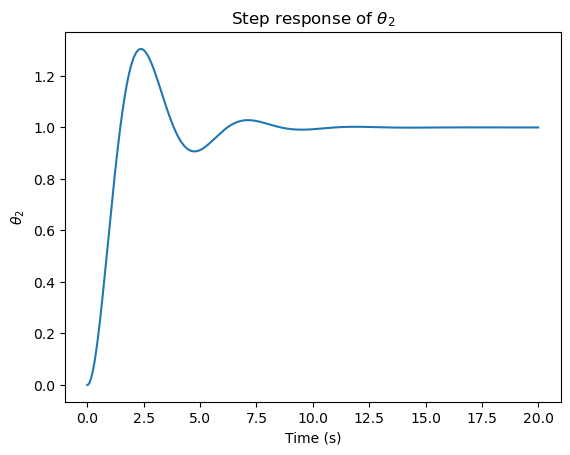

In [6]:
def partial_fraction_expansion_3nd_order_sys(num, den):

    poles = np.roots(den)
    regression_matrix = np.array([[1,1,1], [poles[1]+poles[2], poles[0]+poles[2], poles[0]+poles[1]], [poles[1]*poles[2], poles[0]*poles[2], poles[0]*poles[1]]])
    num_vec = np.zeros(3)
    num_vec[(3-num.shape[0]):3] = num

    coefficients_vec = np.linalg.inv(regression_matrix) @ num_vec  #note @ means matrix multiply in python
    return poles, coefficients_vec






# set system parameters
J = 1 
k = 2
b = 1

# construct arrays to define numerator and denominator. Use powers of s: a_3s^3 + a_2s^2 + a_1s + a_0 corresponds to array: [a_3, a_2, a_1, a_0]
num = np.array([k])
den = np.array([J, b, k, 0])

poles, coefficients = partial_fraction_expansion_3nd_order_sys(num, den)

# generate the data
N = 10000   #number of points
Tf = 20     #time in seconds of simulation
t = np.linspace(0,Tf,N)

# Plot the step reponse (assume initial conditions are zero)
theta_2 = coefficients[0]*np.exp(poles[0]*t) + coefficients[1]*np.exp(poles[1]*t) + coefficients[2]*np.exp(poles[2]*t)
fig, ax = plt.subplots(1,1)
ax.plot(t,theta_2.real)
ax.set_title(r'Step response of $\theta_2$')
ax.set_xlabel('Time (s)')
ax.set_ylabel(r'$\theta_2$')


### In class activity:
# - add a function that calculates and plots the rise time
# - add a function that calculates and plot the maximum overshoot
# - add a function that draws (approximate) bounds on the settling time
# - add a function that calculates the settling time


In [8]:
def s_plane_plot(num_sys, den_sys, fig=[], ax=[]):
    if not fig: 
        fig, ax = plt.subplots(1,1)
    
    poles_sys = np.roots(den_sys)
    for pp in poles_sys:
        ax.plot(np.real(pp), np.imag(pp), 'bx' )

    zeros_sys = np.roots(num_sys)
    for zz in zeros_sys:
        ax.plot(np.real(zz), np.imag(zz), 'ro')

    plt.xlim(np.min(np.real(poles_sys))-0.5, np.max(np.real(poles_sys))+0.5)
    x_left, x_right = plt.xlim()

    if x_right < 0.5:
        x_right = 0.5

    if x_left > -0.5:
        x_left = -0.5

    plt.xlim(x_left, x_right)
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()
    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
    ax.set_title('S-Plane Plot')
    ax.set_xlabel('Real[s]')
    ax.set_ylabel('Imag[s]')

    ax.xaxis.set_label_coords(0.5,-0.01)
    ax.yaxis.set_label_coords(-0.01,0.5)
    return fig, ax



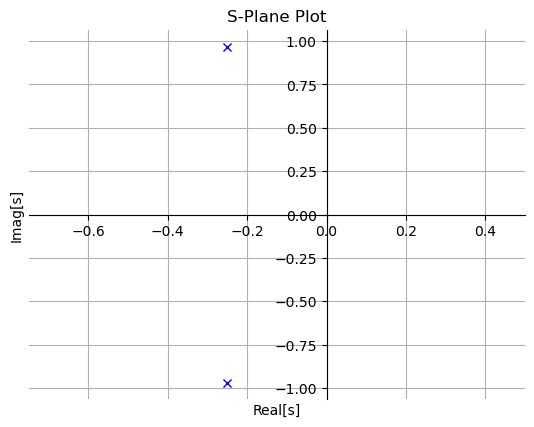

In [12]:
# s-plane plot
den_sys = np.array([J, b, k])
num_sys = np.array([k])
fig, ax = s_plane_plot(num_sys,den_sys)

# In class activity

Select a set of systems, with poles along a vertical line in the s-plane. Make sure you pick a vertical line that ends up with stable systems. Plot the step-responses of each system on the same plot. What do you notice about the step responses? 

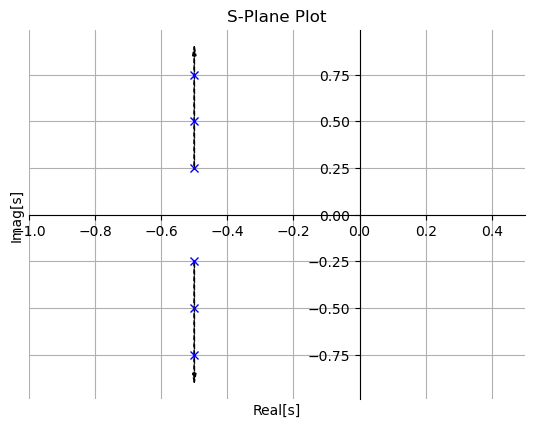

In [56]:
def roots_to_polynomial(roots_poly):
    poly = np.array([1])
    for rr in roots_poly:
        poly = np.convolve(poly, np.array([1, -rr]))
    return np.real(poly)


# pick three polynomials with roots on the same vertical line
roots1 = np.array([-0.5+0.25j, -0.5-0.25j])
roots2 = np.array([-0.5+0.50j, -0.5-0.50j])
roots3 = np.array([-0.5+0.75j, -0.5-0.75j])
den1 = roots_to_polynomial(roots1)
den2 = roots_to_polynomial(roots2)
den3 = roots_to_polynomial(roots3)
num = np.array([1])

fig, ax = s_plane_plot(num,den1)
fig, ax = s_plane_plot(num,den2, fig, ax)
fig, ax = s_plane_plot(num,den3, fig, ax)
ax.arrow(-0.5, 0.25, 0, 0.6, linestyle='--',head_width=0.01, head_length=0.05, fc='k')
ax.arrow(-0.5, -0.25, 0, -0.6, linestyle='--',head_width=0.01, head_length=0.05, fc='k')

Now, select a set of systems with poles along a horizontal line in the s-plane. Make sure you pick a line that ends up with stable systems. Plot the step-responses of each system on the same plot. What do you notice about the step responses? 

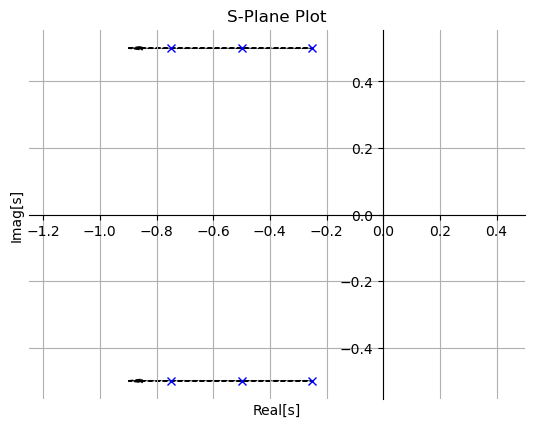

In [59]:
# pick three polynomials with roots on the same vertical line
roots1 = np.array([-0.25+0.5j, -0.25-0.5j])
roots2 = np.array([-0.5+0.5j, -0.5-0.5j])
roots3 = np.array([-0.75+0.5j, -0.75-0.5j])
den1 = roots_to_polynomial(roots1)
den2 = roots_to_polynomial(roots2)
den3 = roots_to_polynomial(roots3)
num = np.array([1])

fig, ax = s_plane_plot(num,den1)
fig, ax = s_plane_plot(num,den2, fig, ax)
fig, ax = s_plane_plot(num,den3, fig, ax)
ax.arrow(-0.25, 0.5, -0.6, 0, linestyle='--',head_width=0.01, head_length=0.05, fc='k')
ax.arrow(-0.25, -0.5, -0.6, 0, linestyle='--',head_width=0.01, head_length=0.05, fc='k')

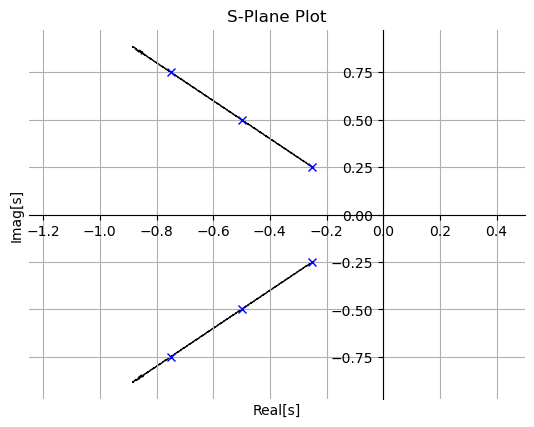

In [61]:
# pick three polynomials with roots on the same diagonal line
roots1 = np.array([-0.25+0.25j, -0.25-0.25j])
roots2 = np.array([-0.5+0.5j, -0.5-0.5j])
roots3 = np.array([-0.75+0.75j, -0.75-0.75j])
den1 = roots_to_polynomial(roots1)
den2 = roots_to_polynomial(roots2)
den3 = roots_to_polynomial(roots3)
num = np.array([1])

fig, ax = s_plane_plot(num,den1)
fig, ax = s_plane_plot(num,den2, fig, ax)
fig, ax = s_plane_plot(num,den3, fig, ax)
ax.arrow(-0.25, 0.25, -0.6, 0.6, linestyle='--',head_width=0.01, head_length=0.05, fc='k')
ax.arrow(-0.25, -0.25, -0.6, -0.6, linestyle='--',head_width=0.01, head_length=0.05, fc='k')

This is important, because sometimes requirements of a control system are stated in terms of rise time, settling time and/or maximum overshoot. 

For second order systems, we have mapped these requirements to an area in the s-plane. Thus we know that any system with-in a certain area will meet the specified requirements! 

See video for exact equations.

In a few weeks, we will be using controllers to "place" the poles of a system anywhere in the s-plane. Now we know where we want to place them!

However, these equations only hold for second order systems. Most systems are higher order... What now?



The step response for an $n$th order system is:
$$
\begin{align*}
C(s) = \frac{c_0}{s} + \sum_k^n \frac{c_k}{s+a_k},
\end{align*}
$$
where
- $\frac{1}{s}$ is the response due to the step,
- $c_1, c_2, \ldots$ are the coefficients of the partial fraction expansion (can be complex),
- $a_1, a_2, \ldots$ are the poles of the transfer function (can be complex).
Note: if $c_1$, $c_2$, $\ldots$ are complex, then they always appear in complex conjugate pairs. Same for the poles. 

Taking inverse Laplace transform:
$$
\begin{align*}
c(t) &= c_0u(t) + \sum_k^n c_k e^{-a_kt} \\
&= c_0 u(t) + \underbrace{\sum_m c_m e^{-a_m t}}_{\text{all $a_m$ are real}} + \underbrace{\sum_p 2 r_p e^{- \alpha t}\cos( \beta t - \theta)}_{\text{response due to imaginary poles}}
\end{align*}
$$
where 
- $a_k = \alpha_k + j \beta_k$ (pole expressed in real and imaginary parts), 
- $c_k = r_k e^{j \theta_k}$ (partial fraction coefficient expressed in polar coordinates)



# In Class Activity

Dominance of a particular decaying exponential is governed by 2 features:
- is the decaying exponential slow compared to the rest of the poles (What does slow mean?)
- magnitude of the partial fraction expansion coefficient (what does this depend on?)

Interestingly: placing a zero close to a pole reduces the magnitude of the partial fraction expansion coefficient. 

Generate several step responses for systems with different pole/zero combinations. 
- Generate systems with dominant poles, and then add zeros to reduce the effect of the dominant poles. 
- Generate systems with dominate poles, add poles with faster dynamics. What happens?


In [ ]:
# Code here

# Simulate system for a given input

Now we want to be able to simulate the response of the system to any input. 

This becomes tedious using Laplace transforms. Luckily, there are built-in functions in python that can help us!


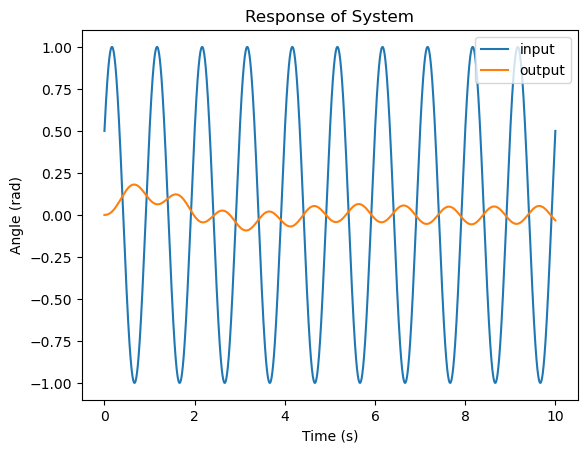

In [72]:
# set system parameters
J = 1 
k = 2
b = 1

den_sys = np.array([J, b, k])
num_sys = np.array([k])

N = 10000
dt = 1/1000
t = np.linspace(0,dt*N,N)

# make a step input
u_step = np.ones((N))

# make a rectangular pulse input
n_pulse = 1000     #width of pulse in number of steps of size dt
u_pulse = np.zeros(N)
u_pulse[0:n_pulse] = np.ones((n_pulse))

# make an input that is a single sinusoid
f = 1   #frequency of sinusoid
theta = math.pi/6
u_sinusoid = np.sin(2*math.pi*f*t + theta)

# make an input that is random
u_rand = np.random.randn(N)

# simulate the system output for selected input signal (note initial conditions are assumed to be zero)
u = u_sinusoid
tout, yout, xout = sp.signal.lsim((num_sys,den_sys),U=u,T=t)

# plot the response
fig, ax = plt.subplots(1,1)
ax.plot(t, u, label='input')
ax.plot(tout, yout, label='output')
ax.set_title('Response of System')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle (rad)')
plt.legend()

plt.show()






# Activity
- Look at response of multi-sines, ramps, triangle waves, noise + pulse, noise + sinusoid, others?
- Try different system parameters

# Observations
- What do you notice about the sinusoidal inputs?
- How does linearity play a role when predicting the output of a pulse?

# Look at another system

![2 Disk Graphic Diagram](2diskGraphic.png "2 Disk Graphic Diagram")

A torque is applied by a motor to a system with two disks. The disks are connected by a thin flexible rod. The rod is supported by bearings on both sides of the disks. The torque applied by the motor is known. The angular position of the right disk is measured. 

We will:
- Obtain governing differential equations,
- Investigate frequency response of system and understand what a resonance is,
- Construct the frequency response using the physical system,
- Derive and analyze a state-space representation


# Schematic Diagram
![2 Disk Schematic Diagram](2diskSchematic.png "2 Disk Schematic Diagram")

# Free Body Diagram
![2 Disk Free Body Diagram](2diskFreeBody.png "2 Disk Free Body Diagram")

# In class activity

Derive the governing differential equations for each disk. You should end up with two differential equations, one for each disk.

Recall the expressions for torques:
$$
\begin{align*}
\text{Bearings: \hspace{1cm} } & T_{B} = b \frac{\text{d}\theta}{\text{dt}} \\
\text{Springs: \hspace{1cm}} & T_S = k( \theta_1 - \theta_2 ) \\
\end{align*}
$$

For the 2-Disk system, the expressions for torques are:
$$
\begin{align*}
 T_{B_1} &= b_1 \frac{\text{d}\theta_1}{\text{dt}} \\
T_S & = k( \theta_1 - \theta_2 ) \\
T_{B_2}  &= b_2 \frac{\text{d}\theta_2}{\text{dt}}
\end{align*}
$$



Two masses, so two equations:
$$ 
\begin{align*}
\sum_i T_i = J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} \hspace{1cm} \text{and} \hspace{1cm} \sum_i T_i = J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} 
\end{align*}
$$






First mass:
$$
\begin{align*}
T_M-T_{B_1} - T_{s}&= J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} \\
T_M - b_1 \frac{\text{d}\theta_1}{\text{dt}} - k( \theta_1 - \theta_2 ) &= J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} \\
J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} + b_1 \frac{\text{d}\theta_1}{\text{dt}} + k\theta_1 - k\theta_2 - T_M &= 0
\end{align*}
$$

Second mass:
$$
\begin{align*}
T_{s} - T_{B_2} &= J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} \\
k( \theta_1 - \theta_2 ) - b_2 \frac{\text{d}\theta_2}{\text{dt}} -  &= J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} \\
J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b_2 \frac{\text{d}\theta_2}{\text{dt}} - k\theta_1 + k\theta_2 &= 0
\end{align*}
$$

# In Class Activity

Using the two equations, find the transfer function from motor torque, $T_M$, to the angle of the second disk, $\theta_2$. You can assume that the system is initially at rest (i.e. initial conditions are zero).

Hint: this will require you to substitute one of the equations into the other. 

We are interested in the relationship between $T_M$ and $\theta_2$. So, substitute expression for second mass into expression for first mass:
$$
\begin{align*}
\frac{J_1J_2}{k}\frac{\text{d}^4\theta_2}{\text{dt}^4} + \frac{J_1b + J_2b}{k}\frac{\text{d}^3\theta_2}{\text{dt}^3} + (J_1 + J_2 + \frac{b^2}{k}) \frac{\text{d}^2\theta_2}{\text{dt}^2} + 2b\frac{\text{d}\theta_2}{\text{dt}}  &= T_M(t) 
\end{align*}
$$

Take Laplace transform of both sides:
$$
\begin{align*}
\frac{J_1J_2}{k}s^4\Theta_2(s) + \frac{J_1b + J_2b}{k}s^3\Theta_2(s) + (J_1 + J_2 + \frac{b^2}{k}) s^2\Theta_2(s) + 2bs\Theta_2(s) &= T_M(s) 
\end{align*}
$$
Gather terms:
$$
\begin{align*}
\frac{\Theta(s)}{T_M(s)} = \frac{1}{ \frac{J_1J_2}{k}s^4 + \frac{J_1b + J_2b}{k}s^3 + (J_1 + J_2 + \frac{b^2}{k}) s^2 + 2bs}  
\end{align*}
$$



# In Class Activity

- Simulate step response. What do you notice?
- Try different parameters
- Make S-plane plot (see code in second cell)


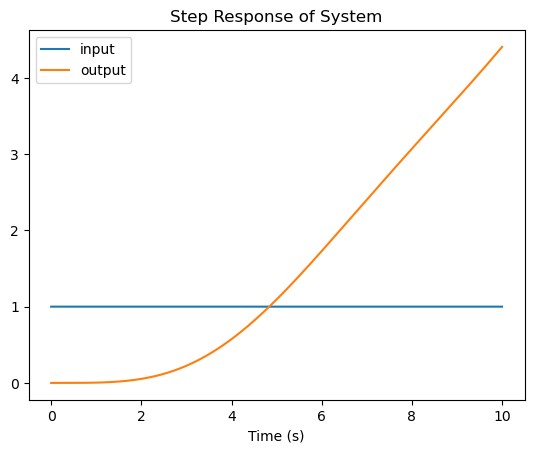

In [7]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


# set system parameters
J1 = 2
J2 = 5
k = 1
b = 0.5

# transfer function numerator and denominator (from equations)
num_sys = np.array([1])
den_sys = np.array([J1*J2/k, (J1+J2)*b/k, (J1+J2+b**2/k), 2*b, 0])

# generate step response
N = 10000
dt = 1/1000
t = np.linspace(0,dt*N,N)
u = np.ones((N))
tout, yout, xout = sp.signal.lsim((num_sys,den_sys),U=u,T=t)
#tout,yout = sp.signal.step((B,A))

fig, ax = plt.subplots(1,1)
ax.plot(t,u, label='input')
ax.plot(tout, yout, label='output')
ax.set_title('Step Response of System')
ax.set_xlabel('Time (s)')
plt.legend()
plt.show()

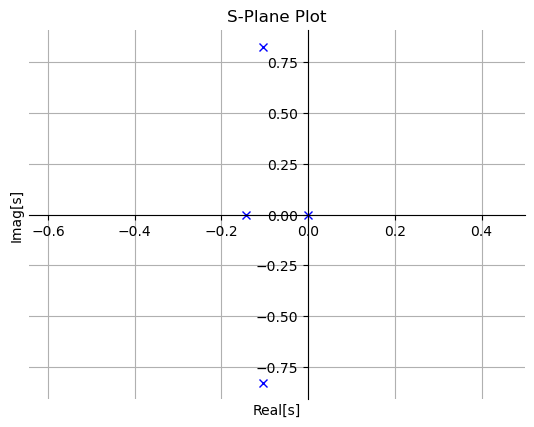

In [9]:
fig, ax = s_plane_plot(num_sys,den_sys)


Poles in the right-hand plane result in unbounded outputs. Why? Hint: look at the time-domain expression of the Step Response.

Poles in the right-hand plane are called unstable poles.  

# State Space

Large, multi-equation systems start to become tedious to put into transfer function form (requires substituting equations into each other). This can make the transfer function error-prone. 

The state space representation offers a nice alternative.

The main idea is to reduce high-order differential equations into an equivalent set of first order differential equations. 

The state-space equations have the following form:
$$
\begin{align*}
\frac{\text{d}x(t)}{\text{dt}} &= Ax(t) + Bu(t), \\
y(t) &= C x(t) + D u(t),
\end{align*}
$$
where $A$, $B$, $C$, $D$ are constant matrices, and $x$ is called the state vector. 

Any linear system can be written in state-space form. It is just another representation of a system. 

Advantages of State-Space:
- Multi-input, multi-output systems are much easier to handle! This is the advent of "Modern" control! Enables the possibility to control more complicated systems.
- Easier to combine multiple differential equations into one expression (don't need to substitute equations into each other)
- Can use linear algebra to find useful properties of the system (such as the poles)
- high-order differential equations are reduced to first order differential equations, so writing down solutions is easier.

You can always choose the states according to this rule:
- For each differential equation, $D(x)=0$ of order $n$, choose $x$, $\frac{\text{d}x}{\text{dt}}$, $\ldots$, $\frac{\text{d}^{n-1}x}{\text{dt}^n}$ as the states.

Rudolf Kalman was one of the founders of modern control theory, establishing the state-space framework.
![Rudolf Kalman](Rudolf-E-Kálmán.jpg "Rudolf Kalman")

# State-Space representation of the 2-Disk system

Start with the two second-order differential equations:
$$
\begin{align*}
J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} + b_1 \frac{\text{d}\theta_1}{\text{dt}} + k\theta_1 - k\theta_2 - T_M &= 0
\end{align*}
$$
and
$$
\begin{align*}
J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b_2 \frac{\text{d}\theta_2}{\text{dt}} - k\theta_1 + k\theta_2 &= 0
\end{align*}
$$

Choose the following states:
- $x_1 = \theta_1$,
- $x_2 = \frac{\text{d}\theta_1}{\text{dt}}$,
- $x_3 = \theta_2$,
- $x_4 = \frac{\text{d} \theta_2}{\text{dt}}$.

Put them in a vector:
$$
\begin{align*}
x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} =
\begin{bmatrix} \theta_1 \\ \frac{\text{d}\theta_1}{\text{dt}} \\ \theta_2 \\
\frac{\text{d} \theta_2}{\text{dt}} \end{bmatrix}  
\end{align*}
$$

We want to find an expression of the form:
$$
\begin{align*}
\frac{\text{d}x}{\text{dt}} = A x + B u
\end{align*}
$$




# In Class Activity
Re-write the differential equations in terms of the states.

Hint #1:
- The expression for $\frac{\text{d}x}{\text{dt}}$ is:
$$
\begin{align*}
\frac{\text{d}x}{\text{dt}} = \begin{bmatrix} \frac{\text{d}x_1}{\text{dt}} \\ \frac{\text{d}x_2}{\text{dt}} \\ \frac{\text{d}x_3}{\text{dt}} \\ \frac{\text{d}x_4}{\text{dt}} \end{bmatrix} = 
 \begin{bmatrix} \frac{\text{d}\theta_1}{\text{dt}} \\ \frac{\text{d}^2\theta_1}{\text{dt}^2} \\ \frac{\text{d} \theta_2}{\text{dt}} \\
\frac{\text{d}^2 \theta_2}{\text{dt}^2} \end{bmatrix}
\end{align*}
$$

Hint #2: Starting with the two differential equations, substitute derivatives with states:
- $\theta_1 = x_1$,
- $\frac{\text{d}\theta_1}{\text{dt}} = x_2$,
- $\theta_2 = x_3$,
- $\frac{\text{d} \theta_2}{\text{dt}} = x_4$.

Hint #3: The input for this system is the motor torque, so $u(t) = T_M(t)$.


Procedure: we need to find expressions for each of the terms in 
$$
\begin{align*}
\frac{\text{d}x}{\text{dt}} = \begin{bmatrix} \frac{\text{d}x_1}{\text{dt}} \\ \frac{\text{d}x_2}{\text{dt}} \\ \frac{\text{d}x_3}{\text{dt}} \\ \frac{\text{d}x_4}{\text{dt}} \end{bmatrix} = 
 \begin{bmatrix} \frac{\text{d}\theta_1}{\text{dt}} \\ \frac{\text{d}^2\theta_1}{\text{dt}^2} \\ \frac{\text{d} \theta_2}{\text{dt}} \\
\frac{\text{d}^2 \theta_2}{\text{dt}^2} \end{bmatrix}
\end{align*}
$$
in terms of the states $x_1$, $x_2$, $x_3$, $x_4$. Recall that the states are defined as:
$$
\begin{align*}
x = \begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} =
\begin{bmatrix} \theta_1 \\ \frac{\text{d}\theta_1}{\text{dt}} \\ \theta_2 \\
\frac{\text{d} \theta_2}{\text{dt}} \end{bmatrix}  
\end{align*}
$$

Let's find the expressions line by line.

# Start with the first element. 

Need to find an expression for $\frac{\text{d}x_1}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x_1}{\text{dt}} = \frac{\text{d}\theta_1}{\text{dt}} = x_2
\end{align*}
$$
The last equality follows by definition of the states.

# Second element

Need to find an expression for $\frac{\text{d}x_2}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x_2}{\text{dt}} = \frac{\text{d}^2\theta_1}{\text{dt}^2} 
\end{align*}
$$
Using the equation of Disk 1, we have an expression for $\frac{\text{d}^2\theta_1}{\text{dt}^2}$. 
$$
\begin{align*}
J_1 \frac{\text{d}^2 \theta_1}{\text{dt}^2} + b_1 \frac{\text{d}\theta_1}{\text{dt}} + k\theta_1 - k\theta_2 - T_M &= 0 
\end{align*}
$$
Re-arrange:
$$
\begin{align*}
\frac{\text{d}^2 \theta_1}{\text{dt}^2} = - \frac{b_1}{J_1} \frac{\text{d}\theta_1}{\text{dt}} - \frac{k}{J_1} \theta_1 + \frac{k}{J_1}\theta_2 + \frac{1}{J_1} T_M 
\end{align*}
$$
Substitute definitions of states:
$$
\begin{align*}
\frac{\text{d}x_2}{dt} = - \frac{k}{J_1} x_1 - \frac{b_1}{J_1} x_2 + \frac{k}{J_1} x_3 + \frac{1}{J_1} u
\end{align*}
$$

# Third element. 

Need to find an expression for $\frac{\text{d}x_3}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x_3}{\text{dt}} = \frac{\text{d}\theta_2}{\text{dt}} = x_4
\end{align*}
$$
The last equality follows by definition of the states.

# Fourth element
Need to find an expression for $\frac{\text{d}x_4}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x_4}{\text{dt}} = \frac{\text{d}^2\theta_2}{\text{dt}^2} 
\end{align*}
$$
Using the equation of Disk 2, we have an expression for $\frac{\text{d}^2\theta_2}{\text{dt}^2}$. 
$$
\begin{align*}
J_2 \frac{\text{d}^2 \theta_2}{\text{dt}^2} + b_2 \frac{\text{d}\theta_2}{\text{dt}} - k\theta_1 + k\theta_2 &= 0 
\end{align*}
$$
Rearrange:
$$
\begin{align*}
\frac{\text{d}^2 \theta_2}{\text{dt}^2} = -\frac{b_2}{J_2} \frac{\text{d}\theta_2}{\text{dt}} + \frac{k}{J_2} \theta_1 - \frac{k}{J_2} \theta_2
\end{align*}
$$
Substitute definitions of states:
$$
\begin{align*}
\frac{\text{d} x_4}{\text{dt}} =  \frac{k}{J_2} x_1 - \frac{k}{J_2} x_3  - \frac{b_2}{J_2} x_4  
\end{align*}
$$

# Put it all together

Now we can put together all the equations into the expression for $\frac{\text{d}x}{\text{dt}}$:
$$
\begin{align*}
\frac{\text{d}x}{\text{dt}} &= \begin{bmatrix} \frac{\text{d}x_1}{\text{dt}} \\ \frac{\text{d}x_2}{\text{dt}} \\ \frac{\text{d}x_3}{\text{dt}} \\ \frac{\text{d}x_4}{\text{dt}} \end{bmatrix} = \begin{bmatrix} x_2 \\ - \frac{k}{J_1} x_1 - \frac{b_1}{J_1} x_2 + \frac{k}{J_1} x_3 + u \\ x_4 \\ \frac{k}{J_2} x_1 - \frac{k}{J_2} x_3  - \frac{b_2}{J_2} x_4 \end{bmatrix} \\
&= \begin{bmatrix} 
0 & 1 & 0 & 0 \\ 
- \frac{k}{J_1} & - \frac{b_1}{J_1} & \frac{k}{J_1} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{J_2} & 0 & \frac{k}{J_2} & - \frac{b_2}{J_2}
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix} +
\begin{bmatrix} 0 \\ \frac{1}{J_1} \\ 0 \\ 0 \end{bmatrix} u
\end{align*}
$$

This is the first half of the state space representation! So far we have:
$$
\begin{align*}
A = \begin{bmatrix}
0 & 1 & 0 & 0 \\ 
- \frac{k}{J_1} & - \frac{b_1}{J_1} & \frac{k}{J_1} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{J_2} & 0 & -\frac{k}{J_2} & - \frac{b_2}{J_2}
\end{bmatrix}
\text{\hspace{1cm} and \hspace{1cm}}
B = \begin{bmatrix} 0 \\ \frac{1}{J_1} \\ 0 \\ 0 \end{bmatrix}
\end{align*}
$$

Now we need to derive the second half of the state-space representation:
$$
\begin{align*}
y(t) = Cx(t) + D u(t)
\end{align*}
$$



# In Class Activity

Derive the second half of the state-space representation for the 2-Disk system. 

Hint: $y(t) = \theta_2(t)$. 



Note that $\theta_2$ is one of the states! 

So we have:
$$
\begin{align*}
y = \theta_2 = x_3 
\end{align*}
$$

In matrix form:
$$
\begin{align*}
y = \begin{bmatrix} 0 & 0 & 1 & 0 \end{bmatrix}
\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ x_4 \end{bmatrix}
\end{align*}
$$

We have completed our state-space representation of the 2-Disk system!
$$
\begin{align*}
A &= \begin{bmatrix}
0 & 1 & 0 & 0 \\ 
- \frac{k}{J_1} & - \frac{b_1}{J_1} & \frac{k}{J_1} & 0 \\
0 & 0 & 0 & 1 \\
\frac{k}{J_2} & 0 & \frac{k}{J_2} & - \frac{b_2}{J_2}
\end{bmatrix} \\
B &= \begin{bmatrix} 0 \\ \frac{1}{J_1} \\ 0 \\ 0 \end{bmatrix} \\
C &= \begin{bmatrix} 0 & 0 & 1 & 0 \end{bmatrix} \\
D &= 0
\end{align*}
$$

# Comment

We did not do anything very special, just re-organizing, re-labelling and gathering of the variables in the equations.


# In Class Activity

Use the procedure from the video to calculate the response due to initial conditions.

Note that because of the way that we derived the state space representation, the initial conditions make physical sense. Look back at the transfer function we wrote down, what can we say about the initial conditions in that case?

Eigenvalues of the A matrix [-0.11+0.76j -0.11-0.76j -0.  +0.j   -0.08+0.j  ]
[[-0.11+0.76j  0.  +0.j    0.  -0.j   -0.  +0.j  ]
 [ 0.  -0.j   -0.11-0.76j  0.  +0.j   -0.  -0.j  ]
 [-0.  +0.j    0.  -0.j   -0.  +0.j    0.  +0.j  ]
 [-0.  +0.j    0.  -0.j    0.  +0.j   -0.08+0.j  ]]


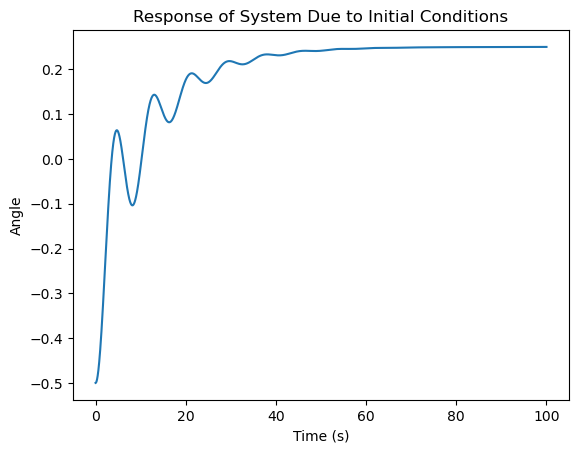

In [43]:
# set system parameters
J1 = 2
J2 = 10
k = 1
b = 0.5

# define state space matrices
A = np.array([[0, 1, 0, 0], [-k/J1, -b/J1, k/J1, 0], [0, 0, 0, 1], [k/J2, 0, -k/J2, -b/J2]]) 
B = np.array([[0], [1/J1], [0], [0]])
C = np.array([[0, 0, 1, 0]])
D = 0

# eigenvalue decomposition of A matrix
Lambda, T = np.linalg.eig(A)

# compare eigenvalues with roots calculated earlier
#print('Roots calculated from transfer function:', np.roots(den_sys))
np.set_printoptions(precision=2, suppress=True)
print('Eigenvalues of the A matrix', Lambda)

# verfiy that the matrix T diagonalizes A
print(np.linalg.inv(T) @ A @ T)

# transform system matrices so that the A matrix is diagonal
A_tilde = np.linalg.inv(T) @ A @ T
B_tilde = np.linalg.inv(T) @ B
C_tilde = C @ T
D_tilde = D

# Calculate response to initial conditions

# initial condition
x_initial = np.array([[1], [0], [-0.5], [0]])
x_tilde_initial = np.linalg.inv(T) @ x_initial

# generate data
N = 10000
dt = 1/100
t = np.linspace(0,dt*N,N)
y = np.zeros(N, dtype=np.csingle)
ii = 0
for pp in Lambda:
    y += C_tilde[0,ii] * np.exp(pp*t) * x_tilde_initial[ii,0]
    ii += 1
   
fig, ax = plt.subplots(1,1)
ax.plot(t, np.real(y), label='output')
ax.set_title('Response of System Due to Initial Conditions')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle')

plt.show()

# In Class Activity

Superimpose the decay-rate of all the poles on the plot. 

Try systems with different poles. Which poles best approximate the settling-time of the system?

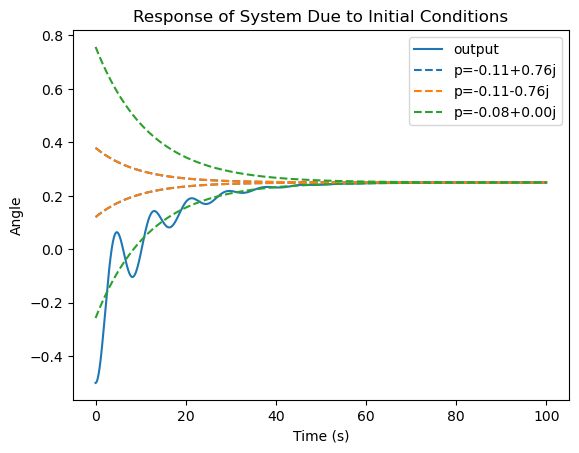

In [52]:
# set system parameters
J1 = 2
J2 = 10
k = 1
b = 0.5

# define state space matrices
A = np.array([[0, 1, 0, 0], [-k/J1, -b/J1, k/J1, 0], [0, 0, 0, 1], [k/J2, 0, -k/J2, -b/J2]]) 
B = np.array([[0], [1/J1], [0], [0]])
C = np.array([[0, 0, 1, 0]])
D = 0

# eigenvalue decomposition of A matrix
Lambda, T = np.linalg.eig(A)

A_tilde = np.linalg.inv(T) @ A @ T
B_tilde = np.linalg.inv(T) @ B
C_tilde = C @ T
D_tilde = D

# Calculate response to initial conditions

# initial condition
x_initial = np.array([[1], [0], [-0.5], [0]])
x_tilde_initial = np.linalg.inv(T) @ x_initial

# calculate response
N = 10000
dt = 1/100
t = np.linspace(0,dt*N,N)
y = np.zeros(N, dtype=np.csingle)
ii = 0
for pp in Lambda:
    y += C_tilde[0,ii] * np.exp(pp*t) * x_tilde_initial[ii,0]
    ii += 1

# calucate the maximum contribution to the response by each pole (what is up with the offset? Can you explain it?)
resp_poles = np.zeros((N,3))
pole_strs = []
jj = 0
for ii in range(4):
    if np.abs(Lambda[ii]) > 1e-10:
        resp_poles[:,jj] = np.abs(C_tilde[0,ii]*x_tilde_initial[ii,0])*np.exp(np.real(Lambda[ii])*t) 
        pole_strs.append('{:.2f}'.format(Lambda[ii]))
        jj += 1
    else:
        offset = np.abs(C_tilde[0,ii]*x_tilde_initial[ii,0])
    
fig, ax = plt.subplots(1,1)
ax.plot(t, np.real(y), label='output')
for ii in range(3):
    ax.plot(t, resp_poles[:,ii]+offset, '--', color='C'+str(ii), label='p='+pole_strs[ii])
    ax.plot(t, -resp_poles[:,ii]+offset, '--', color='C'+str(ii))
#ax.plot(t,np.sum(resp_poles,axis=1))
#ax.plot(t,-np.sum(resp_poles,axis=1))
#ax.plot(t, -resp_pole1, '--', label='p1')
ax.set_title('Response of System Due to Initial Conditions')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Angle')
ax.legend()
plt.show()

# Dominant Poles

If the ratios of the real parts of the poles exceed 5 and there are no zeros nearby, then the poles nearest the $j \omega$ axis dominate the transient response behavior.

# In Class Activity

Plot the response of the 2-disk system to various inputs.

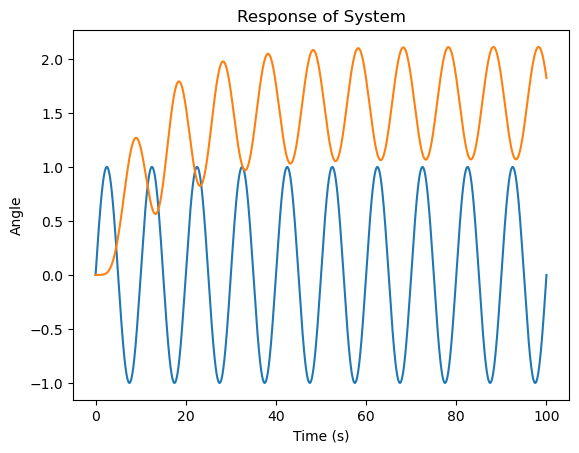

In [48]:
# set system parameters
J1 = 2
J2 = 10
k = 1
b = 0.5

# define state space matrices
A = np.array([[0, 1, 0, 0], [-k/J1, -b/J1, k/J1, 0], [0, 0, 0, 1], [k/J2, 0, -k/J2, -b/J2]]) 
B = np.array([[0], [1/J1], [0], [0]])
C = np.array([[0, 0, 1, 0]])
D = 0

# make a step input
u_step = np.ones((N))

# make a rectangular pulse input
n_pulse = 1000     #width of pulse in number of steps of size dt
u_pulse = np.zeros(N)
u_pulse[0:n_pulse] = np.ones((n_pulse))

# make an input that is a single sinusoid
f = 0.1   #frequency of sinusoid
theta = 0 #math.pi/6
u_sinusoid = np.sin(2*math.pi*f*t + theta)

# make an input that is random
u_rand = np.random.randn(N)

# simulate the system output for selected input signal (note initial conditions are assumed to be zero)
u = u_sinusoid
N = 10000
dt = 1/100
t = np.linspace(0,dt*N,N)
tout, yout, xout = sp.signal.lsim((A, B, C, D),U=u,T=t)

# plot the response
fig, ax = plt.subplots(1,1)
ax.plot(t, u, label='input')
ax.plot(tout, yout, label='output')
ax.set_title('Response of System')
ax.set_xlabel('Time (s)')
ax.set_ylabel( 'Angle' )
plt.show()

# Frequency Domain Representation



[2.23606798 2.23606798]
[3.5]


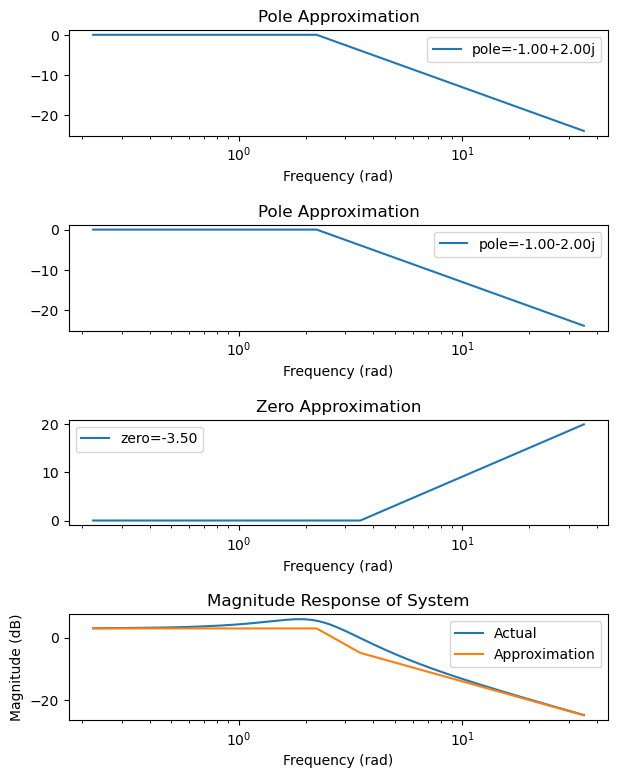

In [32]:
def my_fourier_transform(num,den,omega):
    N = omega.shape[0]
    G_jw = np.zeros(N,dtype=np.csingle)
       
    ii = 0
    for w in omega:
        jomega = 1j*w
        num_jw = 0
        jj = num.shape[0] - 1
        for nn in num:
            num_jw += nn*(jomega**jj)
            jj -= 1
        
        den_jw = 0
        jj = den.shape[0] - 1
        for dd in den:
            den_jw += dd*(jomega**jj)
            jj -= 1
        #print(den_jw)
        #print(num_jw)
        G_jw[ii] = num_jw/den_jw
        ii += 1
    return G_jw

def find_nearest(arr, value):
    idx = (np.abs(arr - value)).argmin()
    return idx

# set system parameters
J1 = 2
J2 = 5
k = 1
b = 0.5

# transfer function numerator and denominator (from equations)
# construct arrays to define numerator and denominator. 
# Use powers of s: a_3s^3 + a_2s^2 + a_1s + a_0 corresponds to array: [a_3, a_2, a_1, a_0]

#num_sys = np.array(np.convolve(np.array([1, 5]), np.array([1, 10])))
#den_sys = np.array(np.convolve(np.array([1, 7]), np.array([1, 3])))
num_sys = np.array([2, 7])
den_sys = np.array([1, 2, 5])


roots_den = np.roots(den_sys)
roots_num = np.roots(num_sys)
den_corner_freqs = np.abs(roots_den)
num_corner_freqs = np.abs(roots_num)

# calculate DC offset
dc_offset = num_sys[0]/den_sys[0]
for rr in roots_den:
    dc_offset /= rr

for rr in roots_num:
    dc_offset *= rr

dc_offset = 20*np.log10(np.abs(dc_offset))

print(den_corner_freqs)
print(num_corner_freqs)

N = 1000
omega_min = np.min( [np.min(den_corner_freqs), np.min(num_corner_freqs)] )
omega_max = np.max( [np.max(den_corner_freqs), np.max(num_corner_freqs)] )
omega = np.logspace(np.log10(omega_min/10),np.log10(omega_max*10),num=N)


num_poles = roots_den.shape[0]
num_zeros = roots_num.shape[0]

pole_approx = np.zeros((N,num_poles))
slope_neg = -20*np.log10(omega)
ii = 0
for cf in den_corner_freqs:
    corner_idx = find_nearest(omega,cf)
    pole_approx[corner_idx:N,ii] = slope_neg[corner_idx:N] - slope_neg[corner_idx]
    ii += 1

zero_approx = np.zeros((N,num_zeros))
slope_pos = 20*np.log10(omega)
ii = 0
for cf in num_corner_freqs:
    corner_idx = find_nearest(omega,cf)
    zero_approx[corner_idx:N,ii] = slope_pos[corner_idx:N] - slope_pos[corner_idx]
    ii += 1

approx_response = np.sum(pole_approx, axis=1) + np.sum(zero_approx, axis=1) + dc_offset

G_jw = my_fourier_transform(num_sys,den_sys,omega)

fig, ax = plt.subplots(num_poles+num_zeros+1,1, figsize=(6.4,(num_poles+num_zeros+1)*2))
for ii in range(num_poles):
    ax[ii].semilogx(omega,pole_approx[:,ii], label='pole={:.2f}'.format(roots_den[ii]))
    ax[ii].legend()
    ax[ii].set_xlabel('Frequency (rad)')
    ax[ii].set_title('Pole Approximation')

for ii in range(num_zeros):
    ax[num_poles+ii].semilogx(omega,zero_approx[:,ii], label='zero={:.2f}'.format(roots_num[ii]))
    ax[num_poles+ii].legend()
    ax[num_poles+ii].set_xlabel('Frequency (rad)')
    ax[num_poles+ii].set_title('Zero Approximation')

ax[num_poles+num_zeros].semilogx(omega,20*np.log10(np.absolute(G_jw)), label='Actual')
ax[num_poles+num_zeros].semilogx(omega,approx_response, label='Approximation')
ax[num_poles+num_zeros].set_title('Magnitude Response of System')
ax[num_poles+num_zeros].set_xlabel('Frequency (rad)')
ax[num_poles+num_zeros].set_ylabel('Magnitude (dB)')
ax[num_poles+num_zeros].legend()

#plt.subplots_adjust(wspace=1)
fig.tight_layout(pad=1.5)
plt.show()
#ax[num_poles+num_zeros-1].semilogx(omega,np.angle(G_jw))

In [ ]:
N = 10000
dt = 1/1000
t = np.linspace(0,dt*N,N)
x0 = np.array([0,0])
u = np.ones((N))
B = np.array([1/J])
A = np.array([1, b/J, 0])
tout, yout, xout = sp.signal.lsim((B,A),U=u,T=t)
#tout,yout = sp.signal.step((B,A))


In [29]:
print(np.log10(0.001))
np.roots([1, 2, 5])

-3.0


array([-1.+2.j, -1.-2.j])

In [ ]:
R1 = 0.5
R2 = 